<a href="https://colab.research.google.com/github/juan-acuna18/FUZZY/blob/main/Clase_1_Fuzzy_5mf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Instalando librerias

In [137]:
!pip install scikit-fuzzy

# 2. Importar librerias

In [138]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Control Proporcional - Sistema SISO
Implementar la logica de control proporcional en logica difusa

*   INPUT: error
*   SALIDA : acción de control  
*   U : [-100,100]

### **PASO 1. Variable de entrada**

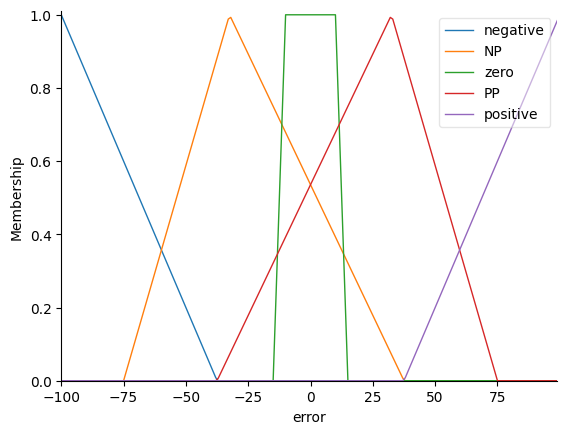

In [158]:
error = ctrl.Antecedent(np.arange(-100,100,1),'error')
error['negative'] = fuzz.trimf(error.universe,[-100,-100,-37.5])
error['NP'] = fuzz.trimf(error.universe,[-75,-32.5,37.5])
error['zero'] = fuzz .trapmf(error.universe,[-15,-10,10,15])
error['PP'] = fuzz.trimf(error.universe,[-37.5,32.5,75])
error['positive'] = fuzz.trimf(error.universe,[37.5,100,100])
error.view()

### **PASO 2. Variable de salida**

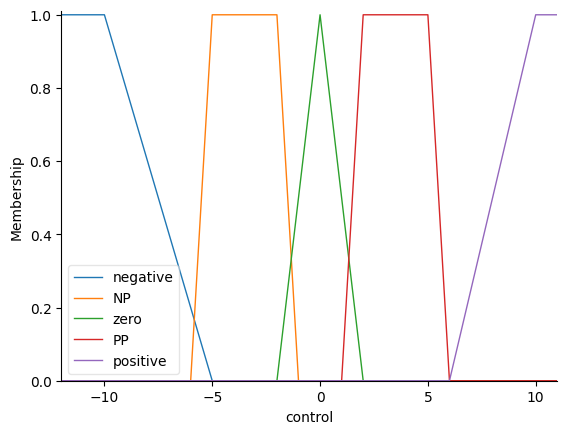

In [159]:
control = ctrl.Consequent(np.arange(-12,12,1), 'control')
control['negative'] = fuzz.trapmf(control.universe,[-12,-12,-10,-5])
control['NP'] = fuzz.trapmf(control.universe,[-6,-5,-2,-1])
control['zero'] = fuzz.trimf(control.universe,[-2,0,2])
control['PP'] = fuzz.trapmf(control.universe,[1,2,5,6])
control['positive'] = fuzz.trapmf(control.universe,[6,10,12,12])
control.view()

### **PASO 3. Inferencia**

In [160]:
rule1 = ctrl.Rule(error['negative'],control['negative'])
rule2 = ctrl.Rule(error['NP'],control['NP'])
rule3 = ctrl.Rule(error['zero'],control['zero'])
rule4 = ctrl.Rule(error['PP'],control['PP'])
rule5 = ctrl.Rule(error['positive'],control['positive'])

In [161]:
control_sys = ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5])
control_sim = ctrl.ControlSystemSimulation(control_sys)

### **PASO 4. Evaluar/SImular en un punto**

Salida defuzzificada = 4.859446653804253
Salida defuzzificada  redodenada= 4.86


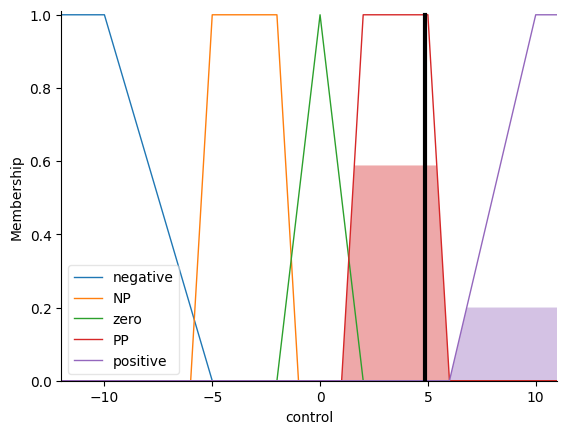

In [162]:
control_sim.input['error'] = 50
control_sim.compute()
control.view(sim=control_sim)
print("Salida defuzzificada =", control_sim.output['control'])
print("Salida defuzzificada  redodenada=", round(control_sim.output['control'],2))

### Punto 5. Contorno de la señal de salida

In [163]:
error_values = np.linspace(-100,100,2001)
out = np.zeros_like(error_values)
n = error_values.size
n

2001

In [164]:
for i in range(n):
  control_sim.input['error'] = error_values[i]
  control_sim.compute()
  out[i] = control_sim.output['control']

In [165]:
import matplotlib.pyplot as plt

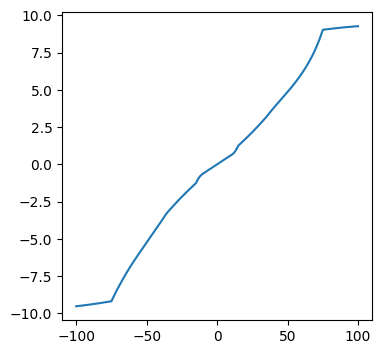

In [166]:
fig = plt.figure(figsize=(4,4))
plt.plot(error_values,out)